<a href="https://colab.research.google.com/github/yjmd2222/Section-2-Project/blob/main/Section_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 2 Project
머신러닝 모델 만들어서 문제 해결

## 문제정의
> 헬스 웨어러블이나 센서를 이용해서 단순한 건강 정보를 제공하는 것 이외에 정확한 자세로 운동하고 있는지 판단할 수 있을까.

개인의 건강을 유지하고 증진시키기 위해 운동은 필수적이다. 하지만 올바른 자세로 운동을 해야 부상을 방지할 수 있고, 잘못된 자세로 인한 골격, 근육, 또는 신경이 상하는 것을 예방할 수 있다. 그래서 자신이 올바른 자세로 운동을 하고 있는지 확인하기 위해 홈트레이닝으로 자세를 살펴보거나, 퍼스널 트레이닝을 받는 사람도 있다. 하지만 여기에 문제점이 있다.
- 골격은 개개인마다 다를 수 있는데 홈트레이닝은 개인에게 맞지 않는 자세일 수도 있다는 점을 중요하게 여기지 않는 경향이 있고, 또 전문가의 피드백이 없다.
- 퍼스널 트레이닝은 피드백은 있지만, 적지 않은 비용이 드는 것, 소비자가 트레이너를 불편해할 수도 있는 것이나 신체 접촉의 문제로 자세를 제대로 점검할 수 없는 가능성도 있다는 것 등의 단점이 있다.

기존 스마트 워치, 스마트 밴드 등으로 불리는 헬스 웨어러블은 착용자에게 심박수, 혈압, 운동량 등의 건강 정보를 알려주는데, 이는 대부분 운동의 양, 강도, 그리고 패턴을 알려주고 있지, 운동을 잘하고 있는지에 대한 정보를 알려주지 않는다. 운동은 조금이라도 하면 건강에 유익하기 때문에 운동을 어느 정도 했는지에 대해 관심이 클 수도 있지만, 위에서 언급한대로 개인에게 맞지 않거나 잘못된 자세로 운동한다면 이는 건강에 해가 된다.

이를 보완하기 위해 자세를 잡아주는 운동 보조기구들이 있다. 하지만 대부분 다음에만 초점을 두고 있다.
1. 보호대로 해당 관절에 손상이 가지 않는 것
2. 저항감을 더해 운동을 무리하게 하지 않는 것
3. 착용할 때에만 자세를 조절하는 것

1은 자세보다는 부상 방지를 목표로 하고 있고, 2는 부상 방지를 하거나 저항을 이겨내는 것으로 운동효과를 늘릴 수 있겠지만 그만큼 다시 부상의 위험이 있고, 3은 그 기구에 의존하여 운동하게 되기 때문에 원래 올바른 자세를 만들기 위한 소근육들을 사용하지 않게 되어 불균형이 생기게 되고, 이 기구 없이 운동할 수 없게 된다.

그래서 단순히 운동의 수치만 알려주거나 제한점을 만드는 것이 아니라 운동을 잘하고 있는지에 대한 정보를 알려줄 수 있다면 이는 기존 헬스 웨어러블과는 다른 차별화된 정보를 주고, 적절한 효율의 센서를 시장에 내놓는다면 홈트레이닝의 문제점과 퍼스널 트레이닝의 단점을 해결하는 훨신 경제적인 상품이 될 수 있을 것이다.

## 준비

In [1]:
# 설치 후 런타임 재시작
!pip install mplcursors # matplotlib 데이터포인트 반환
!pip install -q ipympl # 코랩 interactive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21071 sha256=8a88dd8eff518f4b00f849aa38d07c82324ffe6529035519bd9d29d51a5d2471
  Stored in directory: /root/.cache/pip/wheels/b1/98/ff/4885c231adf3d185efdc38cf8aa2527f1b255ca714a43cb125
Successfully built mplcursors
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:00


## 데이터셋
원 제공처는 [http://groupware.les.inf.puc-rio.br/har](http://groupware.les.inf.puc-rio.br/har)이어야 하는데, 어떤 이유에서인지 웹사이트 접속 불가. [백업 웹사이트](http://web.archive.org/web/20161224072740/http:/groupware.les.inf.puc-rio.br/har)에서 데이터 다운로드

## 데이터셋 출처 표기 required by owners
출처
> Velloso, E.; Bulling, A.; Gellersen, H.; Ugulino, W.; Fuks, H. Qualitative Activity Recognition of Weight Lifting Exercises. Proceedings of 4th International Conference in Cooperation with SIGCHI (Augmented Human '13) . Stuttgart, Germany: ACM SIGCHI, 2013.

라이선스 관련
> Important: you are free to use this dataset for any purpose. This dataset is licensed under the Creative Commons license (CC BY-SA). The CC BY-SA license means you can remix, tweak, and build upon this work even for commercial purposes, as long as you credit the authors of the original work and you license your new creations under the identical terms we are licensing to you. This license is often compared to "copyleft" free and open source software licenses. All new works based on this dataset will carry the same license, so any derivatives will also allow commercial use.

이 데이터셋은 덤벨 컬(Dumbbell biceps curl)의 종목으로 측정한 데이터이다. 피실험자의 허리, 팔, 전완, 그리고 덤벨에 센서를 부착해 여러 위치/속도의 정보를 포함하고 있으며, 운동의 방식에 따라 자세가 올바른지 (A), 올바르지 않은지 (B - E)로 구분되어 있다. 기본적으로는 센서의 수치들인 입력특성에 따라 자세의 등급을 예측하는 분류 모델을 생각해볼 수 있다. 레이블은 세부적으로는 다음과 같다.
<ol type="A">
 <li>정자세</li>
 <li>팔꿈치를 내밀면서 들기</li>
 <li>절반만 들기</li>
 <li>절반만 내리기</li>
 <li>골반을 내밀면서 들기</li>
</ol>

A와 C - E를 보면 동작들 사이 큰 차이가 있기 때문에 잘 구분할 수 있겠지만, B 같은 경우 다른 레이블에 비해 A와 비교적 차이가 적기 때문에 구분하기 어려울 수 있다. 가설을 더 세밀히 따져보자면, C와 D는 절반만 동작하기 때문에 팔/전완의 위치, 속도(가속도) 관련 수치가 A, B, E와 다를 것이고, E는 골반을 내밀기 때문에 허리의 센서에 A - D와는 다른 수치가 감지될 것이다. B는 팔, 전완, 그리고 덤벨의 움직임이 A와 약간 다른데, 이 수치의 차이가 C - E보다는 적을 것이기 때문에 A와 B를 구분하기 어려울 것으로 예상된다.

또한 이 데이터셋은 6명의 피실험자의 데이터로 이루어져 있다. 각각의 피실험자의 동작도 따라서 5개의 label로 구분되어 있다. 모든 사용자가 하나의 동작을 올바르게 하는지를 살펴보는 것에서도 의미를 찾거나 다양한 사용자로부터 데이터를 얻어 모델을 학습시킬 수도 있지만, 모든 사용자의 체형이 똑같다고 간주할 수 없다. 극단적인 예로, 손가락이 몇 개 없거나 척추에 측만이 오거나 몸의 균형이 맞지 않은 사람의 경우 전문가의 소견에 따라 운동 자세를 조정해줄 필요가 있다. 몸에 이상이 없는 일반인이라 할지라도 체형이 다르고 이제까지 살아온 생활 습관에 따라 자기에게 더 알맞은 자세가 있을 수도 있다. 따라서 모델은 한 사람의 데이터만 학습해야 한다. 한 사람의 데이터만 학습했을 때 모델의 성능이 올라갈 것이다.

한 사람은 하나의 레이블에 대해 10번 반복했다. 데이터에는 이것이 구분되어 있지 않다. 이를 구분해서 5번에 대해 훈련, 3번 검증, 2번 평가하는 식으로 데이터를 나누어볼 수 있다. 또는 각 센서마다 정밀한 수치를 기록했으므로 무작위로 섞은 상태에서 훈련, 검증, 평가를 나누어볼 수도 있다. 하지만 모두 동일한 자세로 10번 반복했다는 가정 하에 전자로 데이터를 구분하는 것이 적어도 한 번의 동작을 전부 학습하고, 또 다른 한 번의 동작에 대해 검증, 그리고 평가하는 것이 더 바람직하다.

더 나아가 운동의 자세가 올바른지, 올바르지 않은지로 레이블을 축소해볼 필요성을 생각해볼 수도 있다. 이렇게 되면 모델은 단순해지기 때문에 일반화 성능은 올라갈 수 있다. 하지만 사용자가 센서를 이용해서 올바른 운동 자세를 익히고, 올바르지 않다면 왜 올바르지 않은지 곧바로 알 수 있도록 도와줄 수 있어야 사용자의 입장에서 추가적인 시간 소비나나 비용이 발생하지 않을 것이므로, 다중클래스로 접근하는 것이 좋아보인다.

## 전처리

In [1]:
# 데이터셋 로딩
import pandas as pd
import numpy as np

# 모든 칼럼 보기
pd.set_option('display.max_columns', None)
# 재설정할 경우 아래 실행
# pd.reset_option('all')

# 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/yjmd2222/Section-2-Project/main/data/WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv')
df.head()

<ipython-input-1-a9819392d51a>:11: DtypeWarning: Columns (10,13,18,21,24,67,68,69,70,71,72,85,86,88,89,93,96,99,123,124,126,127,131,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/yjmd2222/Section-2-Project/main/data/WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv')


,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,var_accel_arm,avg_roll_arm,stddev_roll_arm,var_roll_arm,avg_pitch_arm,stddev_pitch_arm,var_pitch_arm,avg_yaw_arm,stddev_yaw_arm,var_yaw_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,kurtosis_roll_arm,kurtosis_picth_arm,kurtosis_yaw_arm,skewness_roll_arm,skewness_pitch_arm,skewness_yaw_arm,max_roll_arm,max_picth_arm,max_yaw_arm,min_roll_arm,min_pitch_arm,min_yaw_arm,amplitude_roll_arm,amplitude_pitch_arm,amplitude_yaw_arm,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,kurtosis_roll_dumbbell,kurtosis_picth_dumbbell,kurtosis_yaw_dumbbell,skewness_roll_dumbbell,skewness_pitch_dumbbell,skewness_yaw_dumbbell,max_roll_dumbbell,max_picth_dumbbell,max_yaw_dumbbell,min_roll_dumbbell,min_pitch_dumbbell,min_yaw_dumbbell,amplitude_roll_dumbbell,amplitude_pitch_dumbbell,amplitude_yaw_dumbbell,total_accel_dumbbell,var_accel_dumbbell,avg_roll_dumbbell,stddev_roll_dumbbell,var_roll_dumbbell,avg_pitch_dumbbell,stddev_pitch_dumbbell,var_pitch_dumbbell,avg_yaw_dumbbell,stddev_yaw_dumbbell,var_yaw_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28/11/2011 14:15,no,1,3.70,41.6,-82.8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.02,0.18,0.02,-3,-18,22,387,525,-267,132.0,-43.7,-53.6,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.65,-0.61,-0.02,143,30,-346,556,-205,-374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.235540,11.698847,104.264727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.31,0.16,0.08,5,21,37,-471.0,191.0,277.0,-111.0,26.5,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,-0.37,-0.43,-170.0,155.0,184,-1160.0,1400.0,-876.0,E
1,eurico,1322489729,62641,28/11/2011 14:15,no,1,3.66,42.8,-82.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.96,0.14,0.05,-2,-13,16,405,512,-254,129.0,-45.3,-49.0,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.79,-0.64,-0.11,146,35,-339,599,-206,-335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.824418,9.645819,100.228053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.31,0.14,0.07,4,22,35,-472.0,184.0,281.0,-112.0,26.2,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,

In [2]:
# 결측치 확인
df.info(verbose=True, show_counts=True) # 너무 길어서 안 보이는 부분에 대한 argument.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39242 entries, 0 to 39241
Data columns (total 159 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    user_name                 39242 non-null  object 
 1    raw_timestamp_part_1      39242 non-null  int64  
 2    raw_timestamp_part_2      39242 non-null  int64  
 3    cvtd_timestamp            39242 non-null  object 
 4    new_window                39242 non-null  object 
 5    num_window                39242 non-null  int64  
 6    roll_belt                 39242 non-null  float64
 7    pitch_belt                39242 non-null  float64
 8    yaw_belt                  39242 non-null  float64
 9    total_accel_belt          39242 non-null  int64  
 10   kurtosis_roll_belt        839 non-null    object 
 11   kurtosis_picth_belt       839 non-null    object 
 12   kurtosis_yaw_belt         839 non-null    object 
 13   skewness_roll_belt        839 non-null    ob

기본적으로 다 채워져 있고, 동일한 개수의 결측치들이 존재하는 행들이 있다.

In [3]:
df.dropna()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,var_accel_arm,avg_roll_arm,stddev_roll_arm,var_roll_arm,avg_pitch_arm,stddev_pitch_arm,var_pitch_arm,avg_yaw_arm,stddev_yaw_arm,var_yaw_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,kurtosis_roll_arm,kurtosis_picth_arm,kurtosis_yaw_arm,skewness_roll_arm,skewness_pitch_arm,skewness_yaw_arm,max_roll_arm,max_picth_arm,max_yaw_arm,min_roll_arm,min_pitch_arm,min_yaw_arm,amplitude_roll_arm,amplitude_pitch_arm,amplitude_yaw_arm,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,kurtosis_roll_dumbbell,kurtosis_picth_dumbbell,kurtosis_yaw_dumbbell,skewness_roll_dumbbell,skewness_pitch_dumbbell,skewness_yaw_dumbbell,max_roll_dumbbell,max_picth_dumbbell,max_yaw_dumbbell,min_roll_dumbbell,min_pitch_dumbbell,min_yaw_dumbbell,amplitude_roll_dumbbell,amplitude_pitch_dumbbell,amplitude_yaw_dumbbell,total_accel_dumbbell,var_accel_dumbbell,avg_roll_dumbbell,stddev_roll_dumbbell,var_roll_dumbbell,avg_pitch_dumbbell,stddev_pitch_dumbbell,var_pitch_dumbbell,avg_yaw_dumbbell,stddev_yaw_dumbbell,var_yaw_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
46,eurico,1322489729,994717,28/11/2011 14:15,yes,1,-21.60,58.00,-92.2,8,-0.157538,3.572235,#DIV/0!,-0.995221,1.482099,#DIV/0!,-80.8,22.0,-0.2,-92.2,1.0,-0.2,11.4,21.0,0.0,18.2000,-4.8000,8.2000,67.0000,50.8000,5.2000,27.5000,-84.2000,3.1000,9.4800,0.55,-0.45,-0.28,-70,-5,44,225,508,249,85.5,26.6,94.30,31,57.2969,76.6319,20.9875,440.4744,-15.7109,27.1140,735.1665,42.8430,44.0727,1942.4018,-0.13,-0.90,1.72,-223,178,-103,-354,383,493,-1.54018,-0.52039,-1.35107,0.13986,-0.74144,0.08811,26.6,94.4,38.0,-49.9,-53.6,13.0,76.5,148.00,25.0,56.8,4.7,100.1,0.4818,3.0839,#DIV/0!,-0.0369,-0.7109,#DIV/0!,16.5,105.1,0.5,4.7,93.1,0.5,11.81,12.00,0.0,4,0.0213,55.7705,2.4575,6.0394,10.9091,2.2932,5.2587,99.9354,2.2012,4.8451,-0.29,0.18,0.05,2,23,36,-469.0,188.0,279.0,-160.0,-8.29,127.0,-1.2781,-1.0583,#DIV/0!,-0.1273,0.5964,#DIV/0!,26.5,138.0,-1.3,-8.3,118.0,-1.3,34.79,20.0,0.00,43,8.33117,-136.38298,12.41064,154.02405,11.71574,10.58001,111.93666,126.06383,6.60173,43.58279,0.77,-1.36,-0.89,-237.0,254.0,235,-839.0,1200.0,-462.0,E
87,eurico,1322489730,770670,28/11/2011 14:15,yes,2,-27.80,60.00,-92.2,8,-1.513346,1.299859,#DIV/0!,-0.224472,-0.910566,#DIV/0!,-92.2,10.0,-1.5,-96.4,6.0,-1.5,4.2,4.0,0.0,0.8000,-27.4000,1.5000,2.2000,59.7000,0.7000,0.5000,-94.3000,1.4000,2.0100,0.13,-0.03,-0.02,-65,-3,48,142,501,289,139.0,55.9,91.70,38,5.0012,128.7268,17.7037,313.4195,49.62

결측치가 없는 행은 결측치 있는 행들의 통계수치를 나타내는 행이다. 하지만 앞서 언급했듯이, 10번의 동작의 각각에 대한 통계수치가 아니라, 센서가 자체적으로 구분한 범위 내에서의 통계수치이므로 전혀 필요하지 않다. 만약 이 통계수치를 올바로 살펴보고자 한다면, 10번의 동작으로 데이터를 구분한 후 확인해야 할 것이다.

In [163]:
# 통계수치를 제외한 원본데이터 추출
nan_cols = df.isna().any()[lambda x: x].index.to_list() # NaN인 칼럼 이름만 뽑아내기. lambda x: x는 True인 것만 indexing하게 된다.
unique_num_cols = ['user_name',	'raw_timestamp_part_1',	'raw_timestamp_part_2',	'cvtd_timestamp', 'new_window', 'num_window'] # 고유번호에 해당하는 칼럼

df_raw = df.drop(nan_cols, axis=1).reset_index(drop=True)

# # 통계수치
# df_stats = df[unique_num_cols + nan_cols + ['num_window', 'classe']].copy()
# df_stats.dropna(inplace=True)
# df_stats.reset_index(drop=True, inplace=True)

시각화를 통해 각 사람별 레이블별 동작을 10개로 구분할 수 있는지 확인해볼 수 있다.

In [5]:
# 데이터 구분
names = df_raw['user_name'].unique()

my_dict = {}
for name in names:
  df_ = df_raw[df_raw['user_name'] == name]
  my_dict[name] = {}
  for classe in ['A', 'B', 'C', 'D', 'E']:
    my_dict[name][classe] = df_[df_['classe'] == classe]

In [6]:
my_dict[name][classe]

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
6358,charles,1322837933,104329,02/12/2011 14:58,no,145,115.0,16.00,2.11,17,0.05,0.13,-0.11,-18,49,-157,33,614,-288,-39.5,-9.24,-51.0,11,1.59,-0.79,0.30,-55,-63,63,416,137,520,27.186916,14.700108,4,-0.02,-0.08,0.05,11,39,6,-360.0,504.0,-31.0,75.4,82.7,28.1,41,-0.34,1.30,0.38,-395.0,46.0,25,-678.0,454.0,537.0,E
6359,charles,1322837933,152287,02/12/2011 14:58,no,145,115.0,16.00,1.98,17,0.06,0.14,-0.03,-18,49,-157,36,624,-299,-39.9,-8.15,-52.4,11,1.56,-0.79,0.36,-66,-68,60,398,137,528,27.186916,14.700108,4,-0.02,-0.08,0.05,11,39,6,-360.0,504.0,-31.0,75.4,80.5,27.9,40,-0.51,1.62,0.16,-386.0,73.0,22,-672.0,477.0,539.0,E
6360,charles,1322837933,172311,02/12/2011 14:58,no,145,115.0,16.00,1.80,17,0.06,0.14,0.03,-16,49,-161,30,619,-289,-40.2,-7.25,-53.6,12,1.51,-0.79,0.41,-70,-68,67,364,149,546,27.186916,14.700108,4,-0.02,-0.08,0.05,11,39,6,-360.0,504.0,-31.0,75.0,78.4,27.7,35,-0.51,1.59,-0.13,-323.0,103.0,23,-667.0,509.0,562.0,E
6361,charles,1322837933,220328,02/12/2011 14:58,no,145,116.0,16.00,1.68,17,0.05,0.14,0.11,-16,49,-162,38,617,-294,-40.4,-6.35,-54.8,13,1.46,-0.79,0.48,-76,-70,75,359,140,563,27.186916,14.700108,4,-0.02,-0.08,0.05,11,39,6,-360.0,504.0,-31.0,74.2,76.8,27.3,34,-0.48,1.25,-0.30,-321.0,81.0,29,-655.0,525.0,578.0,E
6362,charles,1322837933,220380,02/12/2011 14:58,no,145,116.0,16.00,1.54,18,0.05,0.14,0.20,-17,52,-163,39,613,-293,-40.6,-5.56,-56.0,13,1.40,-0.79,0.56,-81,-68,76,338,154,574,27.186916,14.700108,4,-0.02,-0.08,0.05,11,39,6,-360.0,504.0,-31.0,73.5,74.9,26.8,33,-0.59,1.48,-0.18,-315.0,59.0,51,-655.0,544.0,582.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34058,charles,1322837952,916464,02/12/2011 14:59,no,751,158.0,4.92,54.10,27,0.31,0.05,-0.26,-15,55,-260,34,427,-561,-44.0,12.60,-73.9,23,-2.42,0.42,0.26,-213,-34,67,73,188,640,-23.974892,20.496823,3,0.19,1.40,-0.33,-7,-28,6,-352.0,504.0,-23.0,39.9,25.4,-37.8,21,-0.35,0.79,-1.03,-101.0,176.0,0,-110.0,724.0,538.0,E
34059,charles,1322837952,928278,02/12/2011 14:59,no,751,157.0,4.76,54.50,27,0.31,0.03,-0.30,-18,57,-260,38,431,-550,-43.8,11.10,-70.9,23,-2.47,0.39,0.51,-210,-44,61,126,166,633,23.131929,21.452775,6,0.11,1.41,-0.41,14,-58,13,-339.0,519.0,-19.0,38.6,24.6,-37.5,19,-0.56,0.63,-1.18,-102.0,154.0,3,-104.0,721.0,567.0,E
34060,charles,1322837952,928308,02/12/2011 14:59,no,751,157.0,4.68,54.90,27,0.29,0.03,-0.33,-17,55,-256,38,424,-544,-43.4,9.44,-67.9,23,-2.55,0.35,0.74,-210,-44,63,169,169,625,12.904091,37.320544,5,-0.06,1.40,-0.41,6,-43,17,-331.0,529.0,-17.0,37.0,23.7,-37.4,16,-0.63,0.48,-1.20,-82.0,137.0,9,-97.0,730.0,575.0,E
34061,charles,1322837952,976392,02/12/2011 14:59,no,751,157.0,4.62,55.30,27,0.27,0.03,-0.36,-19,55,-256,40,438,-554,-42.7,7.42,-64.5,22,-2.63,0.34,0.95,-200,-44,57,223,163,608,-28.286536,7.982999,3,-0.16,1.36,-0.28,-7,-24,2,-320.0,534.0,-13.0,35.7,23.1,-37.6,12,-0.56,0.22,-1.08,-45.0,109.0,30,-102.0,729.0,599.0,E


In [7]:
# std가 가장 큰 feature 이름 확인해보기
for name in list(my_dict):
  for classe_name, classe_data in my_dict[name].items():
    std_series = classe_data.iloc[:,6:].select_dtypes('number').std()
    largest_std_featname = std_series.idxmax()
    print(name, classe_name, largest_std_featname)
    my_dict[name][classe_name] = [my_dict[name][classe_name], largest_std_featname]

eurico A magnet_forearm_y
eurico B magnet_forearm_y
eurico C magnet_forearm_y
eurico D magnet_forearm_y
eurico E magnet_forearm_y
jeremy A magnet_arm_x
jeremy B magnet_forearm_y
jeremy C magnet_arm_x
jeremy D magnet_arm_x
jeremy E magnet_forearm_y
adelmo A magnet_forearm_x
adelmo B magnet_forearm_y
adelmo C magnet_arm_x
adelmo D magnet_arm_x
adelmo E magnet_forearm_y
carlitos A magnet_arm_x
carlitos B magnet_forearm_y
carlitos C magnet_arm_x
carlitos D magnet_forearm_y
carlitos E magnet_forearm_y
pedro A magnet_arm_x
pedro B magnet_forearm_y
pedro C magnet_arm_x
pedro D magnet_forearm_y
pedro E magnet_forearm_y
charles A magnet_arm_x
charles B magnet_forearm_y
charles C magnet_forearm_y
charles D magnet_forearm_y
charles E magnet_forearm_y


In [ ]:
# 시각화 모듈
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

# interactive. 시간 나면 오류 없애보기기
import mplcursors
from google.colab import output
output.enable_custom_widget_manager()

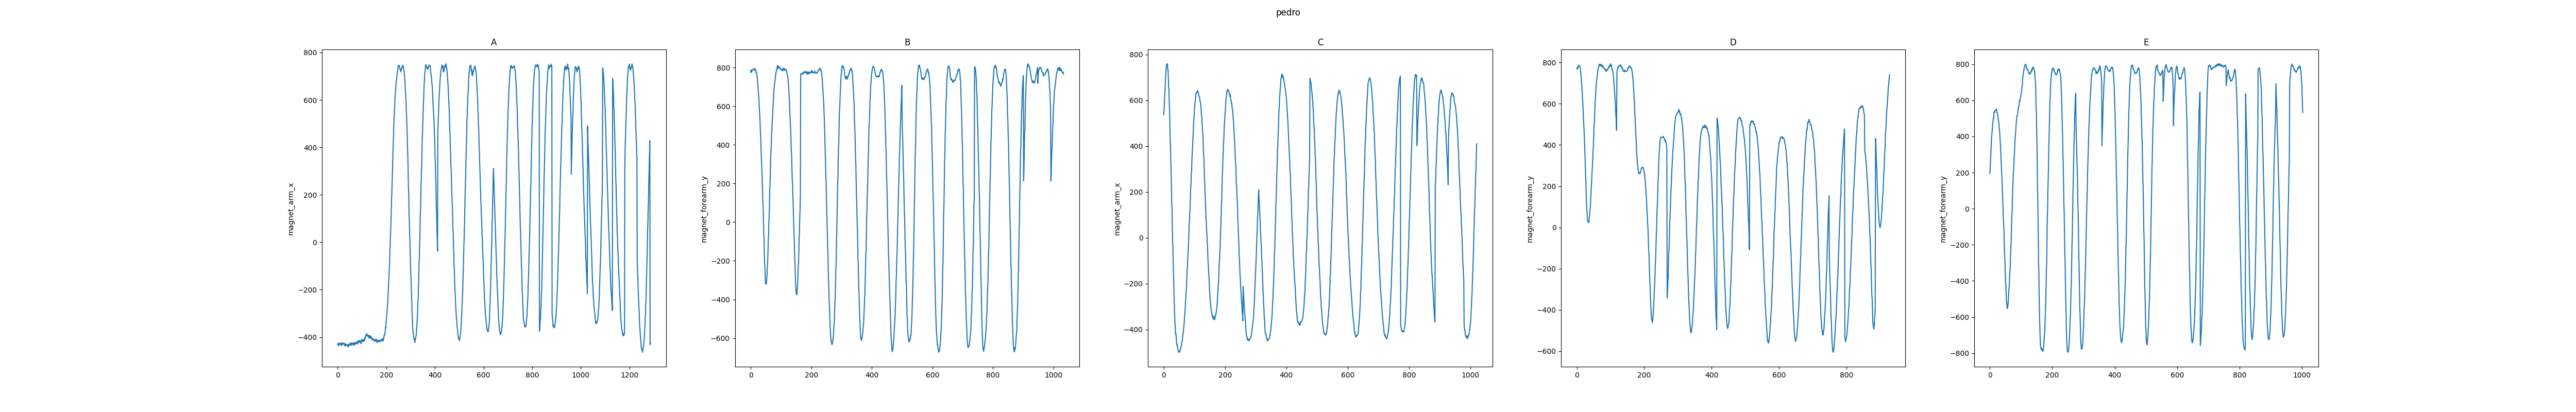

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

In [21]:
# pedro의 모션. std가 가장 큰 모션을 택함. E의 magnet_forearm_y는 좋은 선택이 아닌 것 같음.
plot_list = []
name = 'pedro'
fig, axes = plt.subplots(1, 5, figsize=(50,8))
for idx, (classe_name, classe_data) in enumerate(my_dict[name].items()):
  axes[idx].plot(classe_data[0][classe_data[1]].values)
  axes[idx].set_title(classe_name)
  axes[idx].set_ylabel(classe_data[1])
  fig.suptitle(name)
plot_list.append(fig)

mplcursors.cursor(plot_list)

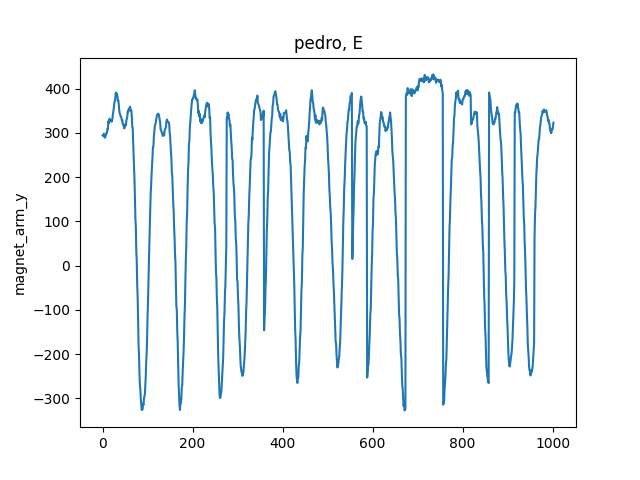

AttributeError: ignored

In [24]:
fig, ax = plt.subplots()
cursor_item = ax.plot(df_raw.query('user_name == "pedro" & classe == "E"')['magnet_arm_y'].values)
ax.set_title('pedro, E')
ax.set_ylabel('magnet_arm_y')

mplcursors.cursor(cursor_item)

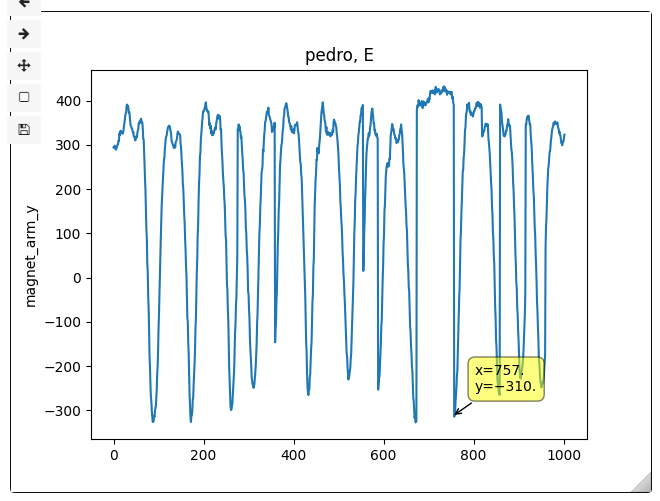

피실험자가 실수한 것도 있겠지만 대략적으로 10개의 봉우리들이 보인다. 다른 칼럼으로 10개의 봉우리가 나오는지도 확인해 볼 수 있다.

Pedro의 경우
<ol type="A">
 <li>181, 317, 411, 502, 614, 669, 769, 830, 893, 961, 1067, 1130, 1176, 1256</li>
 <li>51, 150, 267, 366, 466, 522, 621, 721, 769, 869, 991</li>
 <li>49, 167, 278, 340, 446, 523, 625, 726, 785, 885, 993</li>
 <li>141, 256, 303, 380, 416, 485, 520, 606, 689, 748, 794, 847, 886</li>
 <li>86, 172, 260, 313, 359, 434, 522, 588, 671, 757, 856, 905, 952</li>
</ol>

로 index(loc이 아닌 iloc)를 구분할 수 있다.

In [ ]:
# # 피실험자 별 레이블별 칼럼 그래프
# import os
# def plot_10_curls(col_numb, directory):
#   for name in list(my_dict):
#     fig, axes = plt.subplots(1, 5, figsize=(50,8))
#     for idx, (classe_name, classe_data) in enumerate(my_dict[name].items()):
#       col_name = classe_data[0].select_dtypes('number').columns[col_numb]
#       axes[idx].plot(classe_data[0][col_name].values)
#       axes[idx].set_title(classe_name)
#       fig.suptitle(name)
#       figname = f'{name}_{col_name}.png'
#       path = os.path.join(directory, figname)
#       plt.savefig(path)
#       plt.cla()
#     plt.close(fig)
     
# # 이미지 경로 설정 후 이미지 저장
# !rm -r /content/images; mkdir /content/images
# for idx in range(df_raw.select_dtypes('number').shape[1]):
#   plot_10_curls(idx, '/content/images')
     
# # zip
# !zip -r /content/file.zip /content/images

In [211]:
# 동작별로 번호 할당
df_raw = df_raw.assign(curl_num=np.nan)

pedro_curl_separators = {
    'A': [181, 317, 411, 502, 614, 669, 769, 830, 893, 961, 1067, 1130, 1176, 1256],
    'B': [51, 150, 267, 366, 466, 522, 621, 721, 769, 869, 991],
    'C': [49, 167, 278, 340, 446, 523, 625, 726, 785, 885, 993],
    'D': [141, 256, 303, 380, 416, 485, 520, 606, 689, 748, 794, 847, 886],
    'E': [86, 172, 260, 313, 359, 434, 522, 588, 671, 757, 856, 905, 952]
}

def assign_curl_nums(df, user_name, curl_separators):
  'user_name에 해당하는 key=classe, value=[i, i+1,...]로 구분된 curl_separators 구간별로 동작 번호 할당 후 user_name에 해당하는 DataFrame 반환'

  df_ = df[df['user_name'] == user_name]

  list_ = []
  for k,v in curl_separators.items():
    for i in range(len(v)):
      try: # index i 넘어가면 continue
        # df_pedro[df_pedro['classe'] == k].iloc[v[i]:v[i+1]]['curl_num'] = pd.Series((v[i+1] - v[i]) * [i+1], index=df_pedro[df_pedro['classe'] == k].iloc[v[i]:v[i+1]].index) # 너무 복잡해서 assign 안 되는 듯.
        df__ = df_[df_['classe'] == k].iloc[v[i]:v[i+1]].reset_index(drop=True) # classe로 indexing
        df__['curl_num'] = (v[i+1] - v[i]) * [i+1]
        list_.append(df__)
      except:
        continue

  df___ = pd.concat(list_).reset_index(drop=True) # 한 사람 결과 concat

  return df___.drop(unique_num_cols, axis=1) # 필요 없는 칼럼 드롭

df_pedro = assign_curl_nums(df_raw.copy(), 'pedro', pedro_curl_separators)

In [212]:
display(df_pedro)
print('결측치 개수 =', df_pedro.isna().sum().sum())

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe,curl_num
0,127.0,27.3,1.83,20,-0.37,-0.05,-0.43,-48,69,-178,2,566,-399,1.12,-6.40,-121.0,3,-0.26,-0.24,0.11,-3,-9,25,-409,323,490,15.206906,118.857200,11,0.42,-0.10,-0.20,16,-36,98,476.0,-568.0,-30.0,77.7,3.21,107.0,34,0.51,0.22,-0.03,148.0,217.0,-199,-174.0,749.0,707.0,A,1
1,127.0,27.3,1.85,21,-0.39,-0.05,-0.43,-49,71,-182,6,570,-390,1.17,-6.48,-122.0,3,-0.26,-0.22,0.13,2,-8,29,-416,324,490,15.121094,120.004751,11,0.42,-0.10,-0.21,16,-35,99,475.0,-569.0,-22.0,77.7,2.98,107.0,35,0.51,0.29,-0.05,156.0,228.0,-198,-173.0,751.0,702.0,A,1
2,127.0,27.3,1.87,20,-0.42,-0.05,-0.43,-47,70,-181,6,567,-381,1.23,-6.62,-123.0,3,-0.26,-0.22,0.11,2,-7,30,-411,324,492,14.941997,119.551259,11,0.42,-0.10,-0.21,16,-36,100,475.0,-565.0,-32.0,77.7,2.71,107.0,35,0.48,0.29,-0.05,159.0,230.0,-192,-170.0,752.0,707.0,A,1
3,127.0,27.4,1.90,21,-0.43,-0.05,-0.43,-47,70,-183,5,577,-386,1.27,-6.80,-124.0,3,-0.29,-0.21,0.10,-2,-6,27,-412,321,491,14.670198,120.975237,10,0.42,-0.10,-0.23,15,-33,96,473.0,-569.0,-23.0,77.8,2.44,108.0,35,0.45,0.29,-0.02,161.0,232.0,-188,-178.0,750.0,712.0,A,1
4,128.0,27.4,1.94,20,-0.43,-0.05,-0.43,-46,71,-182,8,570,-400,1.30,-7.00,-125.0,3,-0.35,-0.19,0.08,-3,-5,29,-408,323,497,13.613793,125.331471,11,0.43,-0.11,-0.23,14,-29,98,478.0,-559.0,-28.0,77.8,2.13,108.0,35,0.40,0.32,0.00,160.0,234.0,-186,-175.0,749.0,702.0,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,131.0,25.0,15.60,20,-0.32,0.03,-0.44,-33,69,-180,-5,583,-380,163.00,-11.70,-26.6,37,-3.29,1.75,0.33,298,-111,-181,551,-208,-389,-21.732779,114.872623,12,0.31,-0.42,-0.61,-26,-42,110,296.0,-680.0,-51.0,-179.0,30.40,-117.0,36,-1.49,2.86,0.33,-78.0,-203.0,-281,-259.0,-587.0,-120.0,E,12
4566,131.0,24.8,15.70,20,-0.27,0.02,-0.46,-33,74,-180,-10,590,-367,164.00,-8.63,-30.0,47,-2.91,1.59,0.07,320,-167,-289,504,-230,-429,-7.693885,102.071135,15,0.43,-0.64,-0.43,-11,-74,122,303.0,-682.0,-39.0,179.0,32.60,-122.0,32,-1.53,2.95,0.57,-72.0,-146.0,-263,-312.0,-532.0,-63.0,E,12
4567,131.0,24.6,15.80,20,-0.27,0.00,-0.49,-36,75,-177,-4,583,-364,164.00,-6.18,-32.6,54,-2.39,1.27,-0.13,331,-199,-357,467,-237,-450,-31.182652,79.785646,15,0.43,-0.72,-0.43,-45,-92,105,308.0,-681.0,-38.0,177.0,34.40,-126.0,30,-1.45,3.15,0.72,-76.0,-143.0,-241,-371.0,-468.0,2.0,E,12
4568,131.0,24.4,16.00,20,-0.29,-0.02,-0.51,-43,74,-176,-3,578,-361,164.00,-4.26,-34.5,59,-1.73,0.77,-0.16,350,-220,-400,448,-239,-454,-45.027943,82.118843,10,0.29,-0.79,-0.23,-44,-53,74,314.0,-665.0,-48.0,175.0,36.10,-132.0,28,-1.48,3.13,1.05,-80.0,-115.0,-236,-395.0,-426.0,33.0,E,12


결측치 개수 = 0


In [209]:
from sklearn.model_selection import train_test_split

# train val test split
def custom_train_val_test_split(df):
  '자세별 curl 개수로 train, val, test 셋 구분. val 2개, test 2개'
  dict_ = {'train': {}, 'val': {}, 'test': {}}
  for classe in 'ABCDE':
    curls = df['curl_num'][df['classe'] == classe].unique()
    train_nums, test_nums = train_test_split(curls, test_size=0.2)
    train_nums, val_nums = train_test_split(train_nums, test_size=0.2)
    dict_['train'][classe] = df[(df['classe'] == classe) * (df['curl_num'].isin(train_nums))]
    dict_['val'][classe] = df[(df['classe'] == classe) * (df['curl_num'].isin(val_nums))]
    dict_['test'][classe] = df[(df['classe'] == classe) * (df['curl_num'].isin(test_nums))]

  # concat하고 index drop
  def custom_concat(list_):
    return pd.concat(list_).drop('curl_num', axis=1).reset_index(drop=True)

  return custom_concat(dict_['train']), custom_concat(dict_['val']), custom_concat(dict_['test'])

train, val, test = custom_train_val_test_split(df_pedro.copy())

In [210]:
train.shape, val.shape, test.shape

((2854, 52), (740, 52), (976, 52))

In [208]:
train

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,124.0,26.1,-2.33,20,-0.34,-0.05,-0.39,-44,72,-174,6,584,-383,98.80,-47.90,114.0,17,1.57,-1.03,0.26,70,24,150,-38,341,576,33.900000,120.200000,8,-0.24,-0.13,-0.23,26,-11,73,500.0,-537.0,-104.0,90.0,4.47,101.0,35,0.06,-0.05,-0.03,147.0,241.0,-192,-154.0,740.0,577.0,A
1,124.0,25.9,-1.80,20,-0.40,-0.03,-0.43,-42,72,-175,3,582,-380,125.00,-38.50,57.5,26,-2.67,0.47,0.20,218,5,126,470,211,450,5.153636,118.698434,10,0.34,-0.16,0.25,5,-36,90,517.0,-534.0,-79.0,120.0,85.20,142.0,26,0.39,-1.62,-0.25,-145.0,146.0,-158,-705.0,293.0,522.0,A
2,124.0,25.9,-1.79,20,-0.42,-0.03,-0.44,-43,71,-175,7,580,-371,128.00,-36.90,53.4,27,-2.62,0.47,0.16,233,6,129,489,205,442,2.242854,116.678845,9,0.45,-0.08,0.03,2,-35,82,514.0,-533.0,-84.0,146.0,86.70,168.0,27,0.40,-1.72,-0.26,-150.0,145.0,-165,-708.0,263.0,509.0,A
3,124.0,25.9,-1.76,20,-0.42,-0.03,-0.44,-42,69,-174,-2,581,-375,130.00,-35.50,50.1,28,-2.54,0.48,0.13,247,5,126,524,197,408,11.447029,124.698576,9,0.50,-0.05,-0.15,10,-26,83,513.0,-529.0,-74.0,-176.0,86.90,-153.0,27,0.40,-1.62,-0.33,-170.0,132.0,-162,-697.0,228.0,494.0,A
4,124.0,25.9,-1.75,20,-0.43,-0.03,-0.44,-42,69,-174,2,575,-381,132.00,-33.80,46.4,29,-2.49,0.50,0.08,254,6,119,545,193,394,18.546313,130.696269,9,0.51,-0.05,-0.18,17,-17,89,516.0,-536.0,-58.0,-148.0,85.90,-124.0,26,0.39,-1.51,-0.33,-163.0,122.0,-157,-699.0,210.0,494.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,135.0,26.5,13.70,22,-0.45,-0.02,-0.44,-39,70,-199,2,547,-430,6.73,-4.37,-71.6,5,0.03,-0.37,-0.20,25,14,41,-267,413,481,64.992161,43.347534,14,-0.16,-1.49,0.25,85,95,59,551.0,-496.0,-67.0,148.0,11.80,99.1,32,0.06,-0.08,-0.13,126.0,242.0,-158,-233.0,793.0,789.0,E
1822,135.0,26.4,13.60,22,-0.43,-0.02,-0.43,-39,68,-202,-2,556,-433,6.33,-4.35,-73.3,5,0.10,-0.42,-0.21,20,9,40,-276,404,476,57.295340,79.805907,10,-0.16,-1.57,0.49,53,43,70,563.0,-481.0,-66.0,148.0,12.00,99.3,32,0.02,-0.11,-0.11,121.0,238.0,-161,-235.0,790.0,788.0,E
1823,135.0,26.3,13.60,22,-0.42,-0.03,-0.43,-43,67,-200,2,546,-428,5.94,-4.26,-75.0,3,0.14,-0.43,-0.20,15,2,30,-284,408,483,8.467322,125.786701,10,-0.19,-1.36,0.79,8,-28,90,569.0,-462.0,-68.0,148.0,12.20,99.5,33,0.03,-0.14,-0.16,133.0,242.0,-165,-240.0,796.0,784.0,E
1824,135.0,26.2,13.60,22,-0.40,-0.02,-0.43,-47,70,-200,8,552,-428,5.47,-4.11,-76.8,3,0.18,-0.47,-0.18,12,3,29,-290,394,484,-11.810128,117.969077,11,-0.22,-0.96,0.95,-13,-40,102,582.0,-443.0,-62.0,148.0,12.30,99.7,31,0.10,-0.10,-0.20,122.0,230.0,-163,-239.0,790.0,786.0,E
